# Introduction
- Nama : Harun Hawari Ash Shiddiq
- Dataset : 
    - https://www.kaggle.com/yamaerenay/100-images-of-top-50-car-brands
    - https://www.kaggle.com/saurabhsawhney/stanford-cars-augmented-balanced
- Objective : Computer Vision (Brand Car Classification)

# Import Library

In [1]:
# Packages for Cleaning and Processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Packages for Model Building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv

# Packages for Evaluation
from sklearn.metrics import classification_report

# Data Loading

**Melihat isi direktori**

In [2]:
import os

for dirpath, dirnames, filenames in os.walk('dataset_car'):
  print(f"Ada {len(dirnames)} direktori dan {len(filenames)} gambar didalam {dirpath}")

Ada 3 direktori dan 0 gambar didalam dataset_car
Ada 5 direktori dan 0 gambar didalam dataset_car\Test_Images
Ada 0 direktori dan 43 gambar didalam dataset_car\Test_Images\Ford Edge SUV 2012
Ada 0 direktori dan 38 gambar didalam dataset_car\Test_Images\Honda Accord Sedan 2012
Ada 0 direktori dan 42 gambar didalam dataset_car\Test_Images\Hyundai Santa Fe SUV 2012
Ada 0 direktori dan 36 gambar didalam dataset_car\Test_Images\Mazda Tribute SUV 2011
Ada 0 direktori dan 38 gambar didalam dataset_car\Test_Images\Toyota Sequoia SUV 2012
Ada 5 direktori dan 0 gambar didalam dataset_car\Train_Augmented_Images
Ada 0 direktori dan 435 gambar didalam dataset_car\Train_Augmented_Images\Ford Edge SUV 2012
Ada 0 direktori dan 442 gambar didalam dataset_car\Train_Augmented_Images\Honda Accord Sedan 2012
Ada 0 direktori dan 448 gambar didalam dataset_car\Train_Augmented_Images\Hyundai Santa Fe SUV 2012
Ada 0 direktori dan 432 gambar didalam dataset_car\Train_Augmented_Images\Mazda Tribute SUV 2011
Ada 

>- Terdapat 430 gambar train tiap target
>- Terdapat 140 gambar validation tiap target
>- Terdapat 40 gambar test tiap target

# Eksplorasi Data

**Definisikan fungsi untuk memanggil image**

In [3]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

  # ambil sembarang image
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img);
  plt.title(target_class);
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

**Mobil Ford Edge SUV 2012**

Image shape: (183, 275, 3)


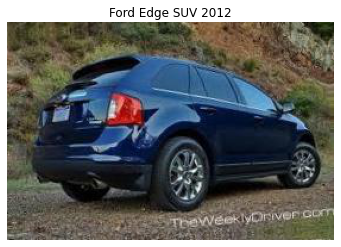

In [5]:
img = view_random_image(target_dir='dataset_car/Train_Augmented_Images/', target_class='Ford Edge SUV 2012')

**Mobil Honda Accord Sedan 2012**

Image shape: (225, 300, 3)


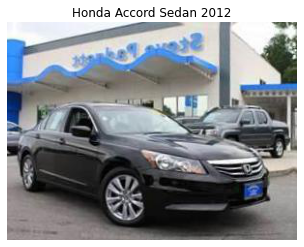

In [5]:
img = view_random_image(target_dir='dataset_car/Train_Augmented_Images/', target_class='Honda Accord Sedan 2012')

**Hyundai Santa Fe SUV 2012**

Image shape: (300, 400, 3)


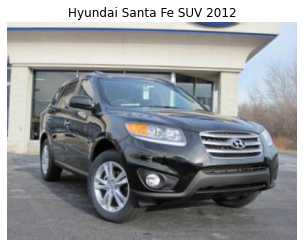

In [6]:
img = view_random_image(target_dir='dataset_car/Train_Augmented_Images/', target_class='Hyundai Santa Fe SUV 2012')

**Hyundai Santa Fe SUV 2012**

Image shape: (194, 259, 3)


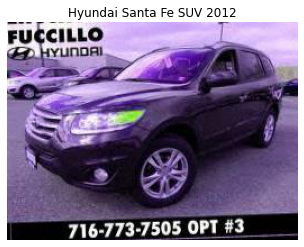

In [7]:
img = view_random_image(target_dir='dataset_car/Train_Augmented_Images/', target_class='Hyundai Santa Fe SUV 2012')

**Mazda Tribute SUV 2011**

Image shape: (246, 500, 3)


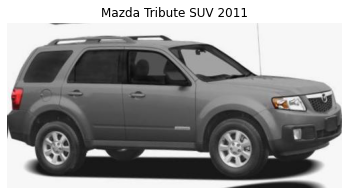

In [8]:
img = view_random_image(target_dir='dataset_car/Train_Augmented_Images/', target_class='Mazda Tribute SUV 2011')

**Toyota Sequoia SUV 2012**

Image shape: (450, 600, 3)


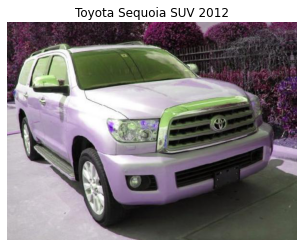

In [9]:
img = view_random_image(target_dir='dataset_car/Train_Augmented_Images/', target_class='Toyota Sequoia SUV 2012')

## Image Data Generator

**Menggunakan data generator karena ekspektasi untuk model deepleaning adalah data yang besar sehingga load data tidak didalam RAM berbarengan** 

In [4]:
img_width = 190
img_height = 190
batch_size = 32

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42) # Set random menjaga agar tidak ada perubahan setiap kali running
batch_size = 32

# Preprocess data dengan scalling
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_dir = 'dataset_car/Train_Augmented_Images/'
valid_dir = 'dataset_car/Test_Images/'
test_dir = 'dataset_car/Validation_Augmented_Images/'

# Set data generator(memberikan gambar dengan targetnya)
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=batch_size,
                                               target_size=(img_width, img_height),
                                               class_mode='categorical',
                                               seed=42)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                               batch_size=batch_size,
                                               target_size=(img_width, img_height),
                                               class_mode='categorical',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(valid_dir,
                                               target_size=(img_width, img_height),
                                               class_mode='categorical',
                                               seed=42)

test_data = valid_datagen.flow_from_directory(test_dir,
                                              target_size=(img_width, img_height),
                                              class_mode='categorical',
                                              seed=42)

Found 2199 images belonging to 5 classes.
Found 2199 images belonging to 5 classes.
Found 197 images belonging to 5 classes.
Found 710 images belonging to 5 classes.


**Melihat perbedaan gambar original dan augmented**

In [6]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()
images_test, labels_test = test_data.next()

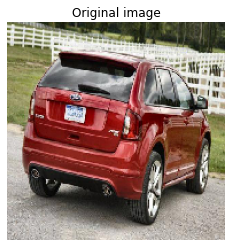

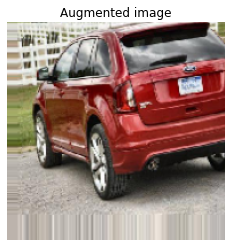

In [7]:
random_number = random.randint(0,5)
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

## EDA Analysis
- Data sangat bervariasi mulai dari 190 sampai 500 pixel
- Data punya 5 target brand mobil yaitu:
    - Ford
    - Honda
    - Hyundai
    - Mazda
    - Toyota
- Data merupakan data RGB (red, green, blue)

# Model Building

## Model Convolutional Neural Network

In [8]:
tf.keras.backend.clear_session()

filters = 16
kernel_size = 3
strides = 2
pool_size = 2

model = Sequential()
model.add(Conv2D(filters=filters, kernel_size=kernel_size, padding='SAME', activation='relu', 
                 input_shape=(190, 190, 3))) # 16 x 188 x 188 x 3, param 3 x 3 
model.add(Dropout(0.3))
model.add(MaxPool2D(pool_size=pool_size)) # 16 x 94 x 94 x 3, param 3 x 3 x 16

model.add(Conv2D(32, 3, activation='relu')) # 32 x 92 x 92 x 3, param 3 x 3 x 16
model.add(Dropout(0.3))
model.add(MaxPool2D(2)) # 32 x 46 x 46 x 3, param 3 x 3 x 16 x 32

model.add(Conv2D(64, 3, activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPool2D(2))

model.add(Conv2D(128, 3, activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPool2D(2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(5, activation='softmax')) # Activation terakhir menggunakan softmax karena model diharapkan hanya memprediksi 1 gambar saja

# Compiling model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 190, 190, 16)      448       
                                                                 
 dropout (Dropout)           (None, 190, 190, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 95, 95, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 93, 32)        4640      
                                                                 
 dropout_1 (Dropout)         (None, 93, 93, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 32)       0         
 2D)                                                    

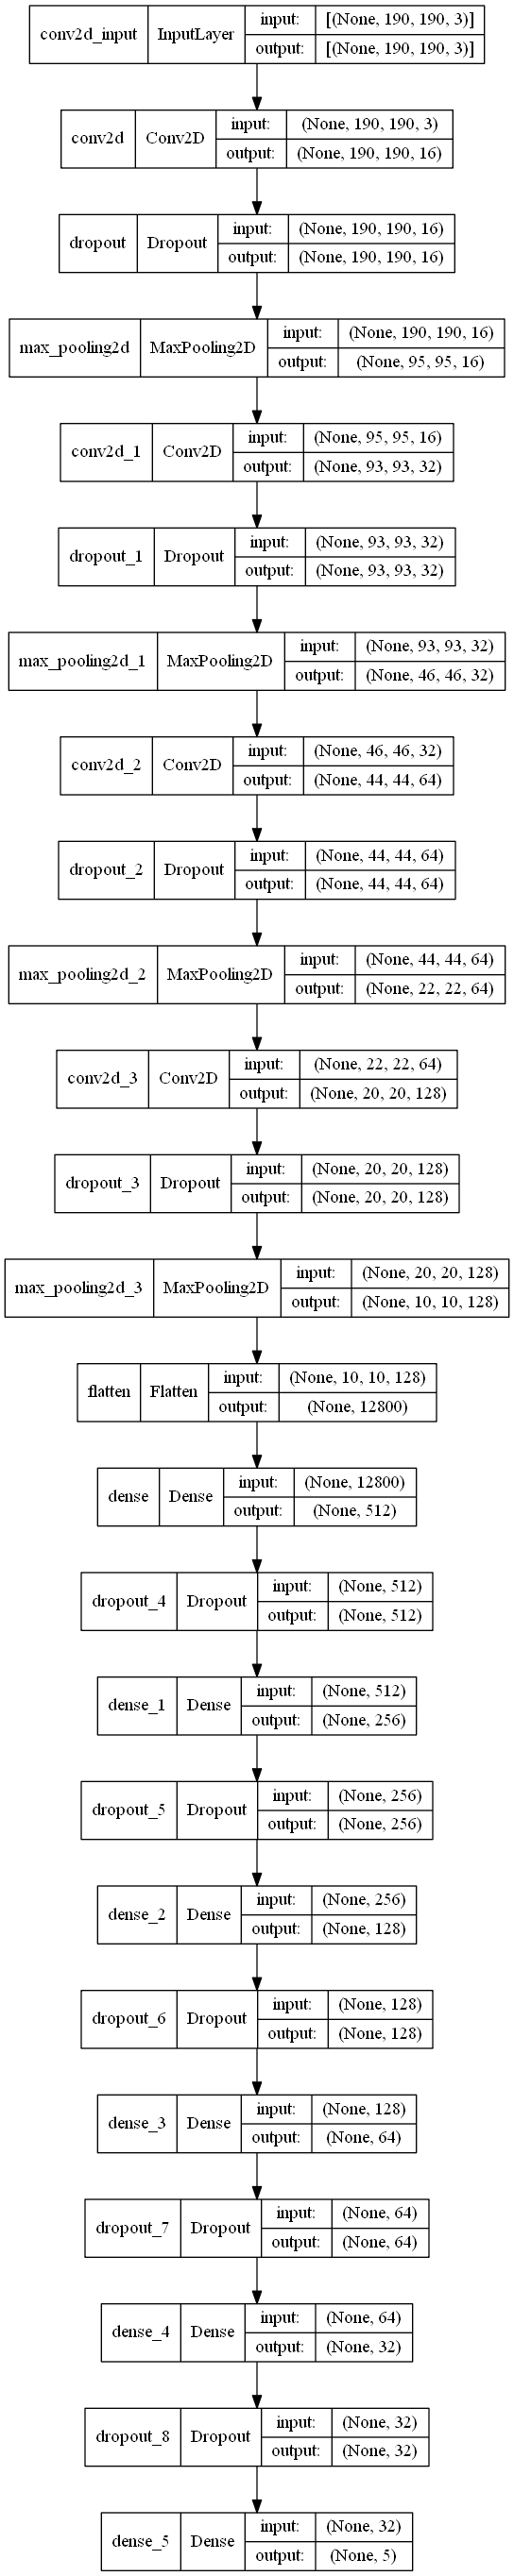

In [16]:
tf.keras.utils.plot_model(model,"CNN.png", show_shapes=True)

In [91]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_loss' , patience=5)

In [10]:
# Implement callback function to stop training
# When accuracy reaches ACCURACY_THRESHOLD
ACCURACY_THRESHOLD = 0.8

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc') == ACCURACY_THRESHOLD):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True

# Instantiate a callback object
callbacks = myCallback()

In [19]:
# Training model
history = model.fit(train_data_augmented,
                    epochs=50,
                    validation_data=valid_data)

Epoch 1/50
69/69 [==============================] - 54s 674ms/step - loss: 1.6196 - accuracy: 0.2001 - val_loss: 1.6095 - val_accuracy: 0.1929
Epoch 2/50
69/69 [==============================] - 44s 643ms/step - loss: 1.6020 - accuracy: 0.2174 - val_loss: 1.5862 - val_accuracy: 0.2437
Epoch 3/50
69/69 [==============================] - 44s 633ms/step - loss: 1.6080 - accuracy: 0.2296 - val_loss: 1.6114 - val_accuracy: 0.2081
Epoch 4/50
69/69 [==============================] - 45s 647ms/step - loss: 1.6119 - accuracy: 0.1937 - val_loss: 1.6098 - val_accuracy: 0.1929
Epoch 5/50
69/69 [==============================] - 45s 652ms/step - loss: 1.6103 - accuracy: 0.1864 - val_loss: 1.6088 - val_accuracy: 0.2183
Epoch 6/50
69/69 [==============================] - 44s 643ms/step - loss: 1.6118 - accuracy: 0.2165 - val_loss: 1.6098 - val_accuracy: 0.2386
Epoch 7/50
69/69 [==============================] - 47s 672ms/step - loss: 1.6110 - accuracy: 0.2005 - val_loss: 1.6101 - val_accuracy: 0.2132

In [13]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

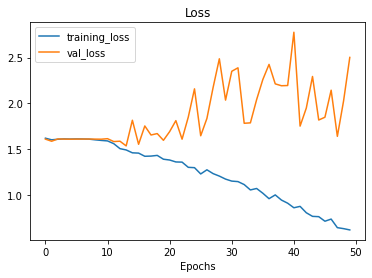

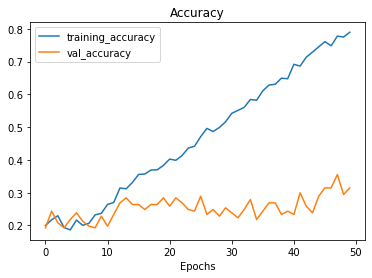

In [21]:
plot_loss_curves(history)

In [22]:
model.evaluate(test_data)

23/23 [==============================] - 6s 274ms/step - loss: 2.4833 - accuracy: 0.3085


[2.483309268951416, 0.30845069885253906]

In [23]:
pred = model.predict(test_data)
pred_classes = np.argmax(pred, axis=1)

true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())
print(classification_report(true_classes, pred_classes))

              precision    recall  f1-score   support

           0       0.22      0.09      0.12       140
           1       0.22      0.82      0.35       143
           2       0.28      0.16      0.20       140
           3       0.00      0.00      0.00       144
           4       0.20      0.06      0.10       143

    accuracy                           0.23       710
   macro avg       0.19      0.22      0.15       710
weighted avg       0.18      0.23      0.15       710



In [24]:
model.save('my_model.h5')

## Pre-trained Model InceptionV3

In [25]:
base_model = tf.keras.applications.InceptionV3(input_shape=(190, 190, 3),
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False # Digunakan agar pre-trained model tidak dilakukan training, model digunakan secara langsung

In [26]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

tf.keras.backend.clear_session()

inputs = Input(shape=(190, 190, 3))
layer_0 = base_model(inputs, training=False)
layer_0 = GlobalAveragePooling2D()(layer_0)
layer_0 = Dropout(0.2)(layer_0)

layer_1 = Dense(128, kernel_initializer='uniform', activation='leaky_relu')(layer_0)
layer_1 = Dropout(rate=0.2)(layer_1)

layer_2 = Dense(64, kernel_initializer='uniform', activation='leaky_relu')(layer_1)
layer_2 = Dropout(rate=0.2)(layer_2)

layer_3 = Dense(128, kernel_initializer='uniform', activation='leaky_relu')(layer_2)
layer_3 = Dropout(rate=0.2)(layer_3)

outputs = Dense(5, activation='softmax')(layer_3)
model_pre = Model(inputs, outputs)

model_pre.compile(loss="categorical_crossentropy",
                optimizer="rmsprop",
              metrics=['accuracy'])

In [27]:
model_pre.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 190, 190, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, 4, 4, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                             

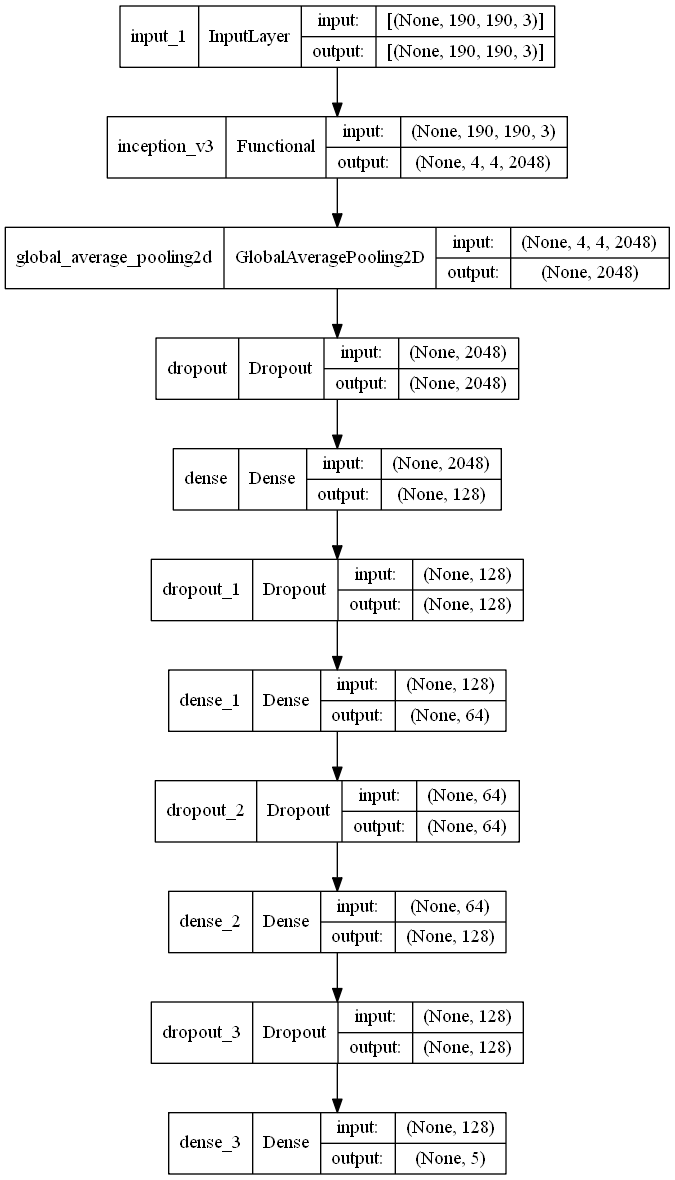

In [28]:
tf.keras.utils.plot_model(model_pre,"model_pre.png", show_shapes=True)

In [29]:
# Fit the model
history2 = model_pre.fit(train_data_augmented,
                        epochs=50,
                        validation_data=valid_data)

Epoch 1/50
69/69 [==============================] - 49s 533ms/step - loss: 1.0444 - accuracy: 0.5744 - val_loss: 1.0588 - val_accuracy: 0.5787
Epoch 2/50
69/69 [==============================] - 29s 413ms/step - loss: 0.5210 - accuracy: 0.8099 - val_loss: 1.2943 - val_accuracy: 0.5431
Epoch 3/50
69/69 [==============================] - 29s 423ms/step - loss: 0.3088 - accuracy: 0.8890 - val_loss: 1.4750 - val_accuracy: 0.5990
Epoch 4/50
69/69 [==============================] - 29s 421ms/step - loss: 0.2245 - accuracy: 0.9295 - val_loss: 1.2075 - val_accuracy: 0.6447
Epoch 5/50
69/69 [==============================] - 29s 422ms/step - loss: 0.1770 - accuracy: 0.9432 - val_loss: 1.5829 - val_accuracy: 0.6041
Epoch 6/50
69/69 [==============================] - 29s 419ms/step - loss: 0.1740 - accuracy: 0.9436 - val_loss: 1.2459 - val_accuracy: 0.6650
Epoch 7/50
69/69 [==============================] - 29s 412ms/step - loss: 0.1411 - accuracy: 0.9550 - val_loss: 1.8484 - val_accuracy: 0.5635

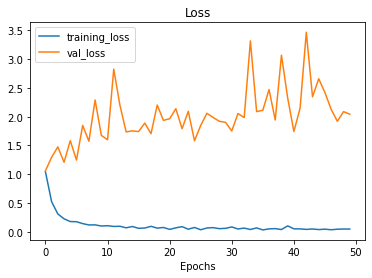

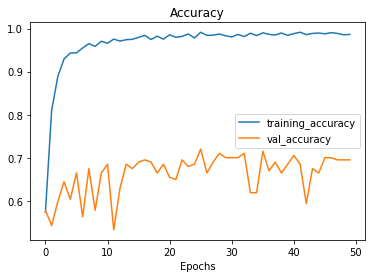

In [30]:
plot_loss_curves(history2)

In [31]:
model_pre.evaluate(test_data)

23/23 [==============================] - 10s 424ms/step - loss: 2.2701 - accuracy: 0.6901


[2.270111322402954, 0.6901408433914185]

In [32]:
pred = model_pre.predict(test_data)
pred_classes = np.argmax(pred, axis=1)

true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())
print(classification_report(true_classes, pred_classes))

              precision    recall  f1-score   support

           0       0.29      0.25      0.27       140
           1       0.17      0.16      0.17       143
           2       0.21      0.26      0.23       140
           3       0.20      0.14      0.17       144
           4       0.18      0.24      0.20       143

    accuracy                           0.21       710
   macro avg       0.21      0.21      0.21       710
weighted avg       0.21      0.21      0.21       710



In [33]:
model_pre.save('my_model2.h5')

## Pre-trained Model ResNet101V2

In [15]:
base_model2 = tf.keras.applications.DenseNet121(input_shape=(190, 190, 3),
                                               include_top=False,
                                               weights='imagenet')

In [16]:
base_model2.trainable = False # Digunakan agar pre-trained model tidak dilakukan training, model digunakan secara langsung

In [28]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

tf.keras.backend.clear_session()

inputs = Input(shape=(190, 190, 3))
layer_0 = base_model2(inputs, training=False)
layer_0 = GlobalAveragePooling2D()(layer_0)
layer_0 = Dropout(0.2)(layer_0)

layer_1 = Dense(128, kernel_initializer='GlorotNormal', activation='leaky_relu')(layer_0)
layer_1 = Dropout(rate=0.2)(layer_1)

layer_2 = Dense(64, kernel_initializer='GlorotNormal', activation='leaky_relu')(layer_1)
layer_2 = Dropout(rate=0.2)(layer_2)

outputs = Dense(5, activation='softmax')(layer_2)
model_pre2 = Model(inputs, outputs)

model_pre2.compile(loss="categorical_crossentropy",
                optimizer="adamax",
              metrics=['accuracy'])

In [18]:
model_pre2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 190, 190, 3)]     0         
                                                                 
 densenet121 (Functional)    (None, 6, 6, 1024)        7037504   
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                             

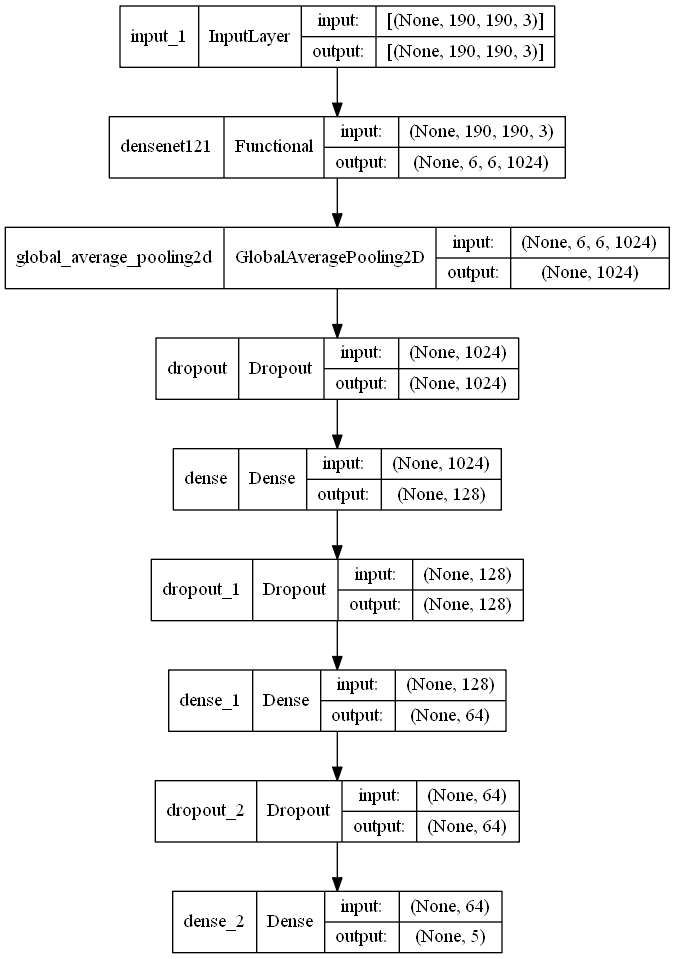

In [19]:
tf.keras.utils.plot_model(model_pre2,"model_pre2.png", show_shapes=True)

In [ ]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_loss' , patience=5)

In [29]:
# Fit the model
history3 = model_pre2.fit(train_data_augmented,
                        epochs=30,
                        validation_data=valid_data)

Epoch 1/30
69/69 [==============================] - 58s 735ms/step - loss: 1.4192 - accuracy: 0.4129 - val_loss: 1.2217 - val_accuracy: 0.4975
Epoch 2/30
69/69 [==============================] - 50s 718ms/step - loss: 0.9403 - accuracy: 0.6367 - val_loss: 0.9309 - val_accuracy: 0.6041
Epoch 3/30
69/69 [==============================] - 49s 714ms/step - loss: 0.7539 - accuracy: 0.7021 - val_loss: 1.0204 - val_accuracy: 0.5990
Epoch 4/30
69/69 [==============================] - 48s 695ms/step - loss: 0.6425 - accuracy: 0.7658 - val_loss: 0.8912 - val_accuracy: 0.6193
Epoch 5/30
69/69 [==============================] - 48s 692ms/step - loss: 0.5210 - accuracy: 0.8208 - val_loss: 0.9229 - val_accuracy: 0.6497
Epoch 6/30
69/69 [==============================] - 48s 698ms/step - loss: 0.4746 - accuracy: 0.8254 - val_loss: 0.8931 - val_accuracy: 0.6548
Epoch 7/30
69/69 [==============================] - 49s 699ms/step - loss: 0.4481 - accuracy: 0.8404 - val_loss: 0.9693 - val_accuracy: 0.6447

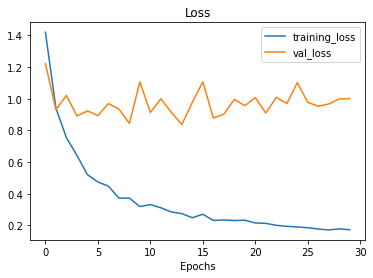

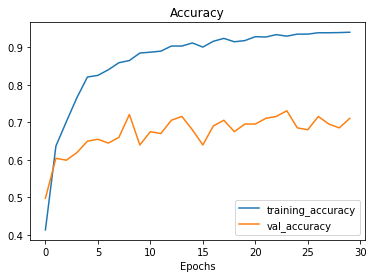

In [30]:
plot_loss_curves(history3)

In [25]:
model_pre2.evaluate(test_data)

23/23 [==============================] - 11s 465ms/step - loss: 0.6593 - accuracy: 0.7873


[0.6592770218849182, 0.7873239517211914]

In [26]:
pred = model_pre2.predict(test_data)
pred_classes = np.argmax(pred, axis=1)

true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())
print(classification_report(true_classes, pred_classes))

              precision    recall  f1-score   support

           0       0.21      0.29      0.24       140
           1       0.20      0.15      0.17       143
           2       0.25      0.24      0.24       140
           3       0.19      0.23      0.21       144
           4       0.16      0.12      0.14       143

    accuracy                           0.20       710
   macro avg       0.20      0.20      0.20       710
weighted avg       0.20      0.20      0.20       710



In [22]:
model_pre2.save('my_model3.h5')

## Trial

In [7]:
pretrained_model3 = tf.keras.applications.ResNet152V2(input_shape=(190,190,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

234561536/234545216 [==============================] - 47s 0us/step


In [8]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(5, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [9]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 190, 190, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 196, 196, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 95, 95, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 97, 97, 64)   0           ['conv1_conv[0][0]']         

 conv4_block20_out (Add)        (None, 12, 12, 1024  0           ['conv4_block19_out[0][0]',      
                                )                                 'conv4_block20_3_conv[0][0]']   
                                                                                                  
 conv4_block21_preact_bn (Batch  (None, 12, 12, 1024  4096       ['conv4_block20_out[0][0]']      
 Normalization)                 )                                                                 
                                                                                                  
 conv4_block21_preact_relu (Act  (None, 12, 12, 1024  0          ['conv4_block21_preact_bn[0][0]']
 ivation)                       )                                                                 
                                                                                                  
 conv4_block21_1_conv (Conv2D)  (None, 12, 12, 256)  262144      ['conv4_block21_preact_relu[0][0]
          

In [11]:
his=model.fit(train_data_augmented, epochs=10, validation_data=valid_data)

Epoch 1/10
69/69 [==============================] - 116s 1s/step - loss: 0.6446 - accuracy: 0.7644 - val_loss: 0.9521 - val_accuracy: 0.7360
Epoch 2/10
69/69 [==============================] - 90s 1s/step - loss: 0.1871 - accuracy: 0.9459 - val_loss: 0.8524 - val_accuracy: 0.7310
Epoch 3/10
69/69 [==============================] - 90s 1s/step - loss: 0.1292 - accuracy: 0.9613 - val_loss: 0.9155 - val_accuracy: 0.7563
Epoch 4/10
69/69 [==============================] - 90s 1s/step - loss: 0.0989 - accuracy: 0.9714 - val_loss: 0.9353 - val_accuracy: 0.7259
Epoch 5/10
69/69 [==============================] - 91s 1s/step - loss: 0.0707 - accuracy: 0.9795 - val_loss: 1.0959 - val_accuracy: 0.7157
Epoch 6/10
69/69 [==============================] - 91s 1s/step - loss: 0.0542 - accuracy: 0.9859 - val_loss: 0.8387 - val_accuracy: 0.7868
Epoch 7/10
69/69 [==============================] - 88s 1s/step - loss: 0.0532 - accuracy: 0.9841 - val_loss: 0.9114 - val_accuracy: 0.7513
Epoch 8/10
69/69 [=

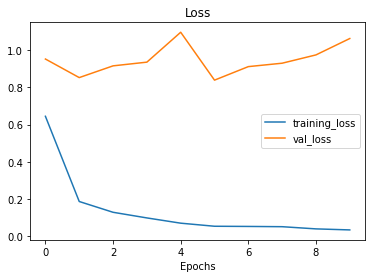

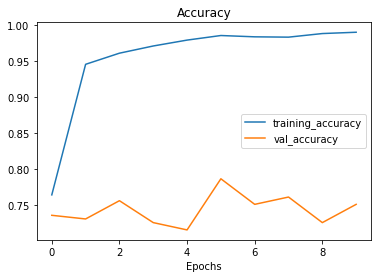

In [14]:
plot_loss_curves(his)

In [ ]:
model.evaluate(test_data)

In [ ]:
pred = model.predict(test_data)
pred_classes = np.argmax(pred, axis=1)

true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())
print(classification_report(true_classes, pred_classes))

In [38]:
model.save('model_coba2.h5')

## Model

In [39]:
base_model3 = tf.keras.applications.DenseNet121(input_shape=(190, 190, 3),
                                               include_top=False,
                                               weights='imagenet')

In [40]:
base_model3.trainable = False # Digunakan agar pre-trained model tidak dilakukan training, model digunakan secara langsung

In [44]:
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

tf.keras.backend.clear_session()

inputs = Input(shape=(190, 190, 3))
layer_0 = base_model3(inputs, training=False)
layer_0 = GlobalAveragePooling2D()(layer_0)
layer_0 = Dropout(0.2)(layer_0)

layer_1 = Dense(128, kernel_initializer='uniform', activation='relu')(layer_0)
layer_1 = Dropout(rate=0.2)(layer_1)

layer_2 = Dense(64, kernel_initializer='uniform', activation='relu')(layer_1)
layer_2 = Dropout(rate=0.2)(layer_2)

outputs = Dense(5, activation='softmax')(layer_2)
model_pre3 = Model(inputs, outputs)

model_pre3.compile(loss="categorical_crossentropy",
                optimizer="adam",
              metrics=['accuracy'])

In [45]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_loss' , patience=5)

In [46]:
# Fit the model
history4 = model_pre3.fit(train_data_augmented,
                        epochs=10,
                        validation_data=valid_data)

Epoch 1/20
193/193 [==============================] - 125s 615ms/step - loss: 2.0562 - accuracy: 0.2954 - val_loss: 1.5589 - val_accuracy: 0.4444
Epoch 2/20
193/193 [==============================] - 112s 577ms/step - loss: 1.3449 - accuracy: 0.5328 - val_loss: 1.2564 - val_accuracy: 0.5341
Epoch 3/20
193/193 [==============================] - 114s 589ms/step - loss: 1.0878 - accuracy: 0.6338 - val_loss: 1.2815 - val_accuracy: 0.5663
Epoch 4/20
193/193 [==============================] - 112s 579ms/step - loss: 0.9124 - accuracy: 0.6915 - val_loss: 1.2881 - val_accuracy: 0.5556
Epoch 5/20
193/193 [==============================] - 113s 584ms/step - loss: 0.8006 - accuracy: 0.7281 - val_loss: 1.3438 - val_accuracy: 0.5824
Epoch 6/20
193/193 [==============================] - 116s 598ms/step - loss: 0.7527 - accuracy: 0.7487 - val_loss: 1.2456 - val_accuracy: 0.6004
Epoch 7/20
193/193 [==============================] - 118s 610ms/step - loss: 0.6808 - accuracy: 0.7738 - val_loss: 1.2284 -

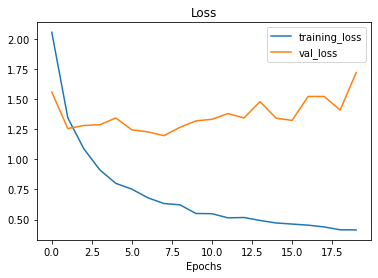

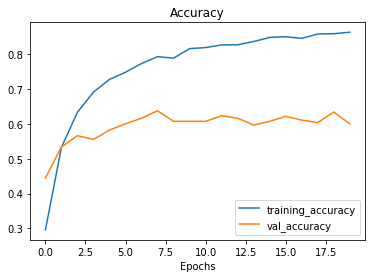

In [52]:
plot_loss_curves(history4)

In [53]:
model_pre3.evaluate(test_data)

63/63 [==============================] - 31s 480ms/step - loss: 1.4233 - accuracy: 0.6199


[1.4233007431030273, 0.6198801398277283]

In [58]:
np.unique(true_classes)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [59]:
np.unique(pred_classes)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [49]:
pred = model_pre3.predict(test_data)
pred_classes = np.argmax(pred, axis=1)

true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys())
print(classification_report(true_classes, pred_classes))

              precision    recall  f1-score   support

           0       0.02      0.02      0.02       143
           1       0.07      0.06      0.06       140
           2       0.07      0.06      0.06       150
           3       0.08      0.13      0.10       143
           4       0.10      0.05      0.07       143
           5       0.08      0.06      0.07       140
           6       0.09      0.11      0.10       140
           7       0.08      0.09      0.09       140
           8       0.07      0.03      0.04       143
           9       0.06      0.08      0.07       143
          10       0.06      0.06      0.06       144
          11       0.09      0.18      0.12       150
          12       0.07      0.04      0.05       140
          13       0.15      0.06      0.08       143

    accuracy                           0.07      2002
   macro avg       0.08      0.07      0.07      2002
weighted avg       0.08      0.07      0.07      2002



In [50]:
model_pre3.save('model_trial.h5')

# Inference

In [35]:
load_model = tf.keras.models.load_model("my_model2.h5")

In [36]:
def load_and_prep_image(filename, img_shape=224):
  img = tf.io.read_file(filename)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img

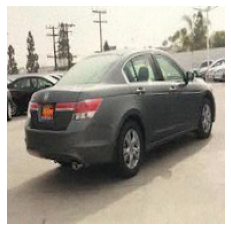

In [37]:
from PIL import Image
new_img = Image.open('honda.jpg')
new_img = new_img.resize((190,190), Image.ANTIALIAS)
plt.imshow(new_img);
plt.axis(False);

In [38]:
new_img = tf.expand_dims(np.array(new_img), axis=0)
inference = load_model.predict(new_img)
inference.argmax()

2

In [39]:
print(train_data.class_indices)

{'Ford Edge SUV 2012': 0, 'Honda Accord Sedan 2012': 1, 'Hyundai Santa Fe SUV 2012': 2, 'Mazda Tribute SUV 2011': 3, 'Toyota Sequoia SUV 2012': 4}
